In [55]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Student Profiles Wrangled.csv')

# UNIVARIATE

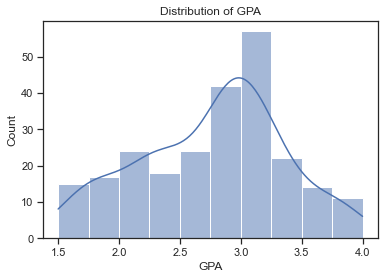

In [56]:
sns.histplot(data=df, x='GPA', kde=True)
plt.title('Distribution of GPA')
plt.show()

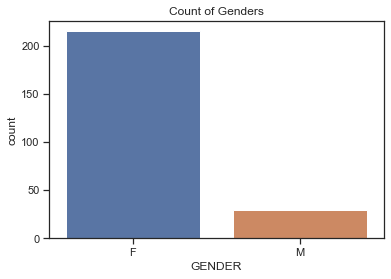

In [57]:
sns.countplot(data=df, x='GENDER')
plt.title('Count of Genders')
plt.show()

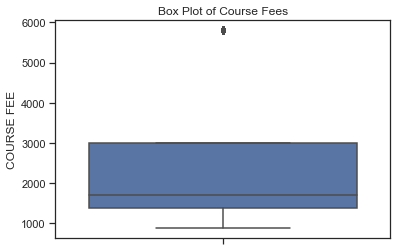

In [58]:
sns.boxplot(data=df, y='COURSE FEE')
plt.title('Box Plot of Course Fees')
plt.show()

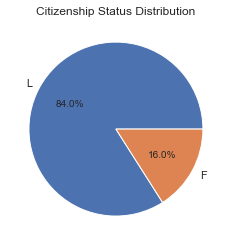

In [59]:
df['CITIZENSHIP_STATUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Citizenship Status Distribution')
plt.ylabel('')
plt.show()

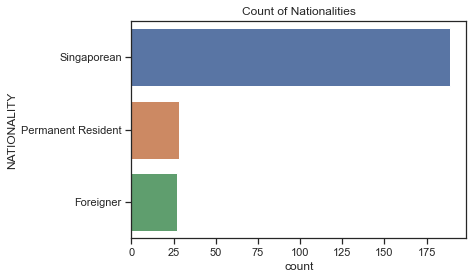

In [60]:
sns.countplot(data=df, y='NATIONALITY')
plt.title('Count of Nationalities')
plt.show()

# BIVARIATE

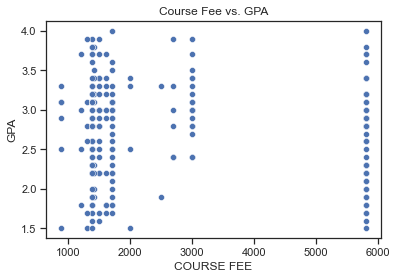

In [61]:
sns.scatterplot(data=df, x='COURSE FEE', y='GPA')
plt.title('Course Fee vs. GPA')
plt.show()

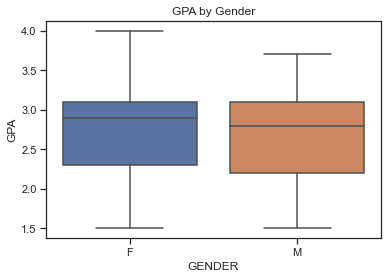

In [62]:
sns.boxplot(data=df, x='GENDER', y='GPA')
plt.title('GPA by Gender')
plt.show()

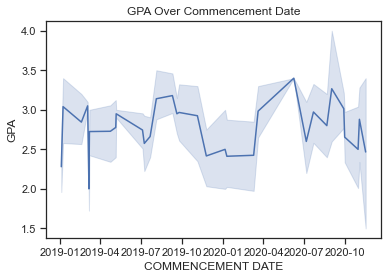

In [63]:
df['COMMENCEMENT DATE'] = pd.to_datetime(df['COMMENCEMENT DATE'], errors='coerce')
sns.lineplot(data=df, x='COMMENCEMENT DATE', y='GPA')
plt.title('GPA Over Commencement Date')
plt.show()

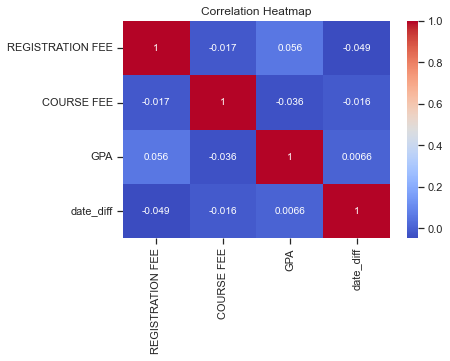

In [64]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

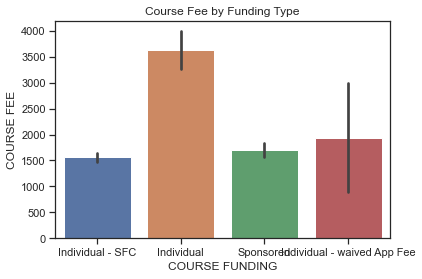

In [65]:
sns.barplot(data=df, x='COURSE FUNDING', y='COURSE FEE')
plt.title('Course Fee by Funding Type')
plt.show()


# TRIVARIATE

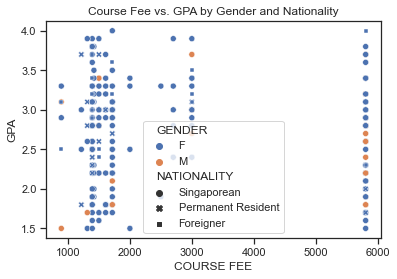

In [66]:
sns.scatterplot(data=df, x='COURSE FEE', y='GPA', hue='GENDER', style='NATIONALITY')
plt.title('Course Fee vs. GPA by Gender and Nationality')
plt.show()


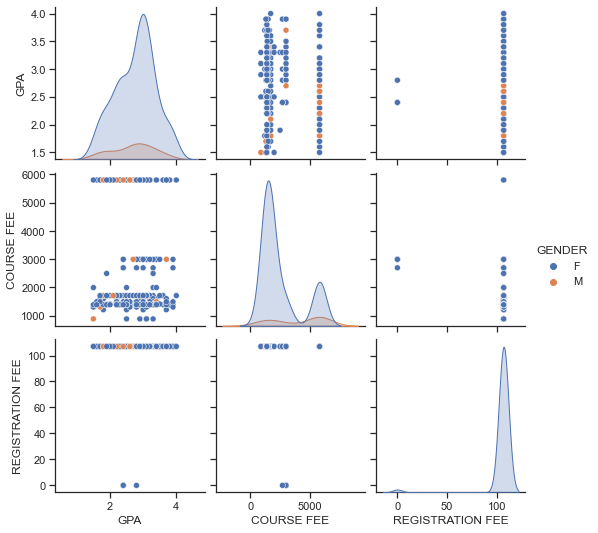

In [67]:
sns.pairplot(df, vars=['GPA', 'COURSE FEE', 'REGISTRATION FEE'], hue='GENDER')
plt.show()

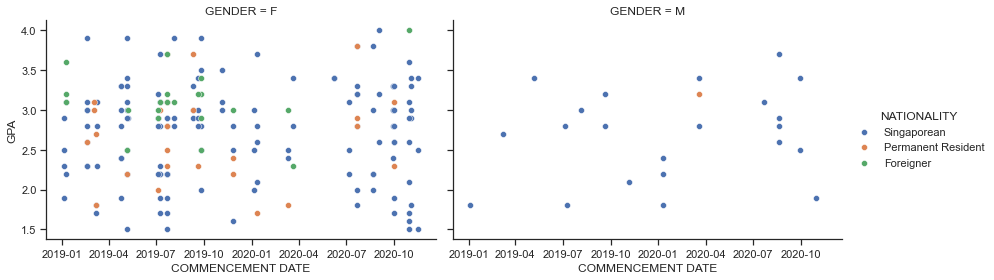

In [68]:
g = sns.FacetGrid(df, col='GENDER', hue='NATIONALITY', height=4, aspect=1.5)
g.map(sns.scatterplot, 'COMMENCEMENT DATE', 'GPA').add_legend()
plt.show()


In [69]:
df['NATIONALITY'].unique()

array(['Singaporean', 'Permanent Resident', 'Foreigner'], dtype=object)

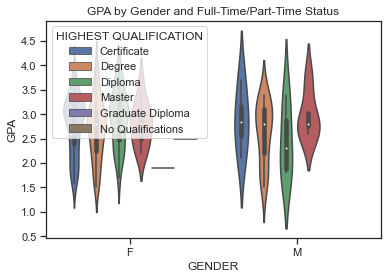

In [70]:
sns.violinplot(data=df, x='GENDER', y='GPA',hue='HIGHEST QUALIFICATION')
plt.title('GPA by Gender and Full-Time/Part-Time Status')
plt.show()

# Tests

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   STUDENT ID                             244 non-null    object        
 1   SALUTATION                             244 non-null    object        
 2   GENDER                                 244 non-null    object        
 3   NATIONALITY                            244 non-null    object        
 4   DOB                                    244 non-null    object        
 5   HIGHEST QUALIFICATION                  244 non-null    object        
 6   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object        
 7   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    object        
 8   DESIGNATION                            244 non-null    object        
 9   INTAKE NO                              244 non-null    object    

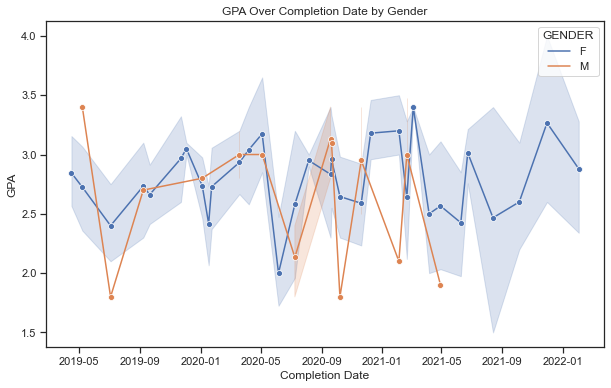

In [72]:
# Convert the COMPLETION DATE column to datetime if it is not already
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='COMPLETION DATE', y='GPA', hue='GENDER', marker='o')

# Adding labels and title
plt.title('GPA Over Completion Date by Gender')
plt.xlabel('Completion Date')
plt.ylabel('GPA')

# Show the plot
plt.show()

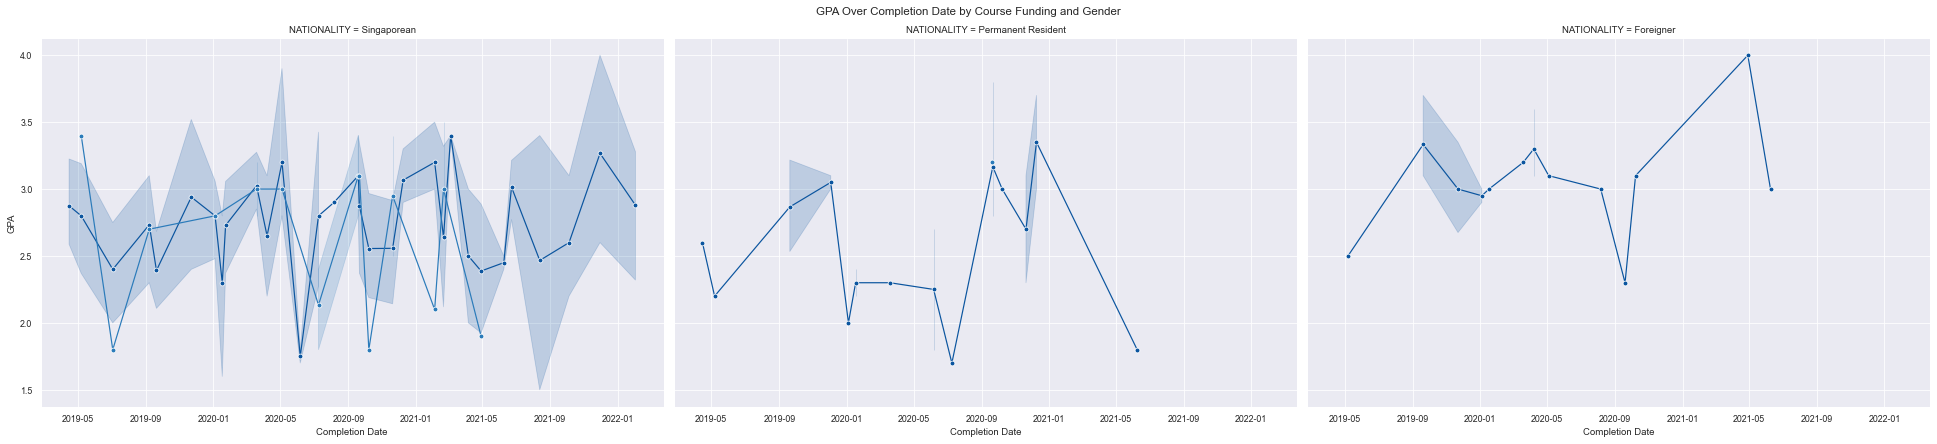

In [76]:
# Assuming 'df' is your DataFrame and it has 'COMPLETION DATE', 'GPA', 'GENDER', and 'COURSE FUNDING' columns

# Convert the COMPLETION DATE column to datetime if it is not already
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Create a custom plotting function
def lineplot_with_hue(data, **kwargs):
    sns.lineplot(data=data, x='COMPLETION DATE', y='GPA', hue='GENDER', marker='o', **kwargs)

# Create a FacetGrid to plot GPA over Completion Date for each COURSE FUNDING
g = sns.FacetGrid(df, col='NATIONALITY', height=6, aspect=1.5)
g.map_dataframe(lineplot_with_hue)

# Adding labels and title
g.set_axis_labels('Completion Date', 'GPA')
g.fig.suptitle('GPA Over Completion Date by Course Funding and Gender', y=1.02)  # Adjust y for title spacing

# Show the plot
plt.show()


C:\Users\Rejey Ezekiel\AppData\Local\Temp\ipykernel_8308\970734018.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist.set_xticklabels(xtick_labels)


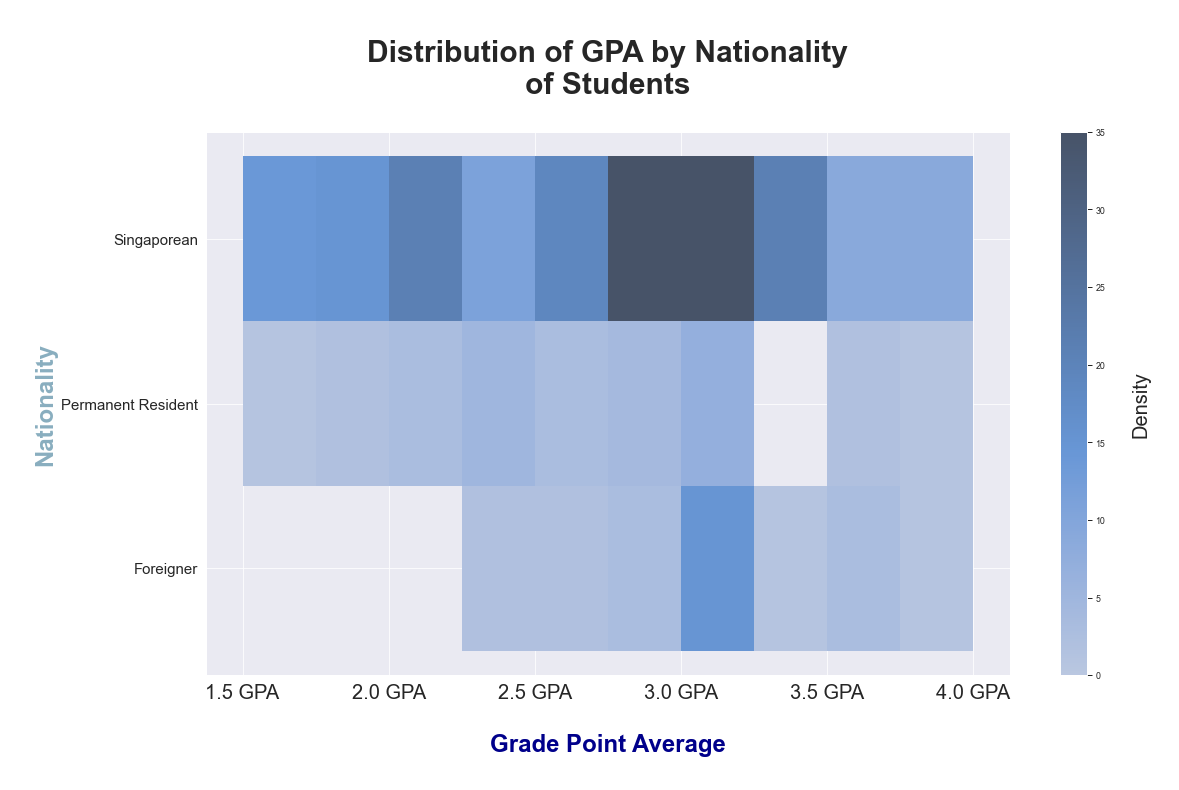

In [74]:
# sns.set(style="ticks", color_codes=True)
sns.set_theme(context='paper', style='darkgrid', palette='ch:s=.45,rot=-.25', font='sans-serif')

plt.figure(figsize=(18, 10))

# Create the histogram plot with filled bins
hist = sns.histplot(data=df, x='GPA', y='NATIONALITY', cbar=True) 

# Add GPA beside each Xtick
xtick_labels = [f"{gpa} GPA" for gpa in hist.get_xticks()]
hist.set_xticklabels(xtick_labels)

# Adding a color bar
cbar = hist.collections[0].colorbar
cbar.set_label('\nDensity\n',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('\nGrade Point Average\n',fontsize=24,color='#00008b',weight='bold')
plt.ylabel('\nNationality', fontsize=24,color='#89aebf',weight='bold')
plt.title('\nDistribution of GPA by Nationality\nof Students\n',fontsize=30,weight='bold')
plt.show()

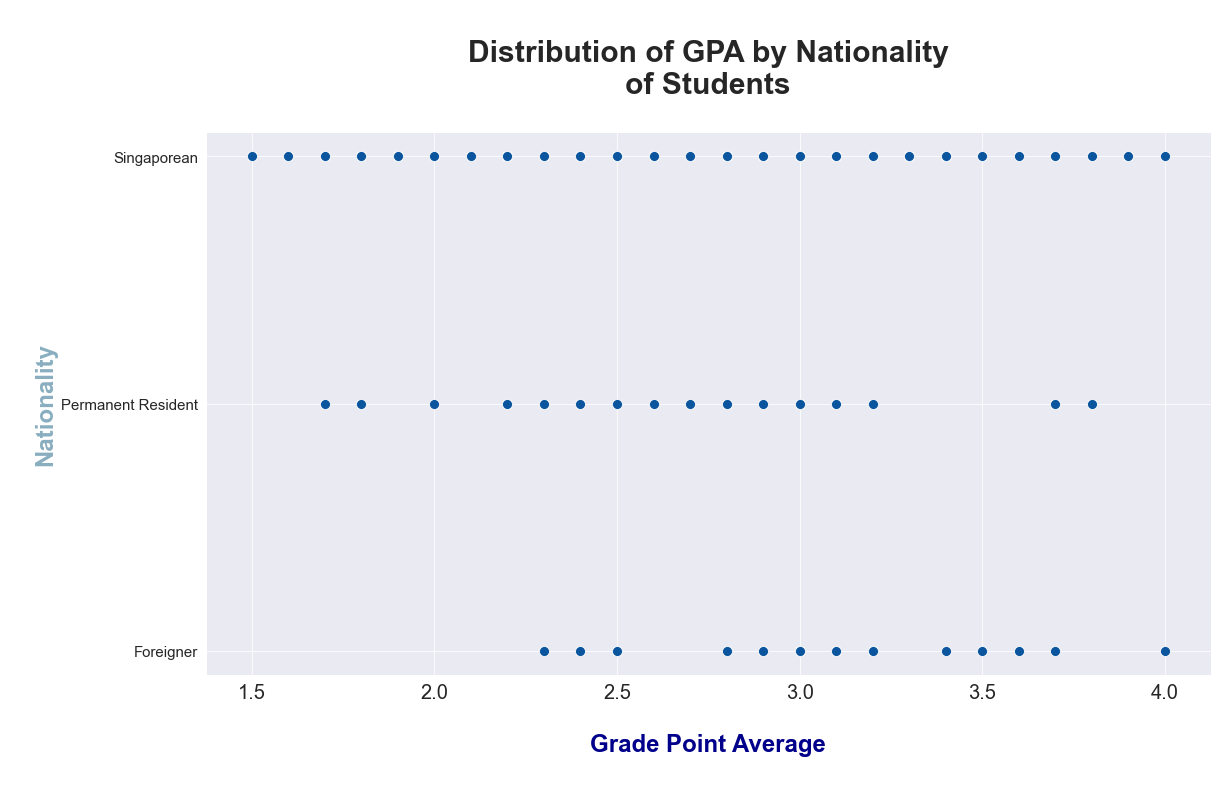

In [75]:
# sns.set(style="ticks", color_codes=True)
sns.set_theme(context='paper', style='darkgrid', palette='Blues_r', font='sans-serif')

plt.figure(figsize=(18, 10))

# Create the scatter plot
scatter = sns.scatterplot(data=df, x='GPA', y='NATIONALITY',s=100)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('\nGrade Point Average\n', fontsize=24, color='#00008b', weight='bold')
plt.ylabel('\nNationality', fontsize=24, color='#89aebf', weight='bold')
plt.title('\nDistribution of GPA by Nationality\nof Students\n', fontsize=30, weight='bold')
plt.show()